In [2]:
%matplotlib inline
import pandas as pd

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

In [3]:
data.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [7]:
print data.dtypes
print "\n"
print len(data.index)

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object


985


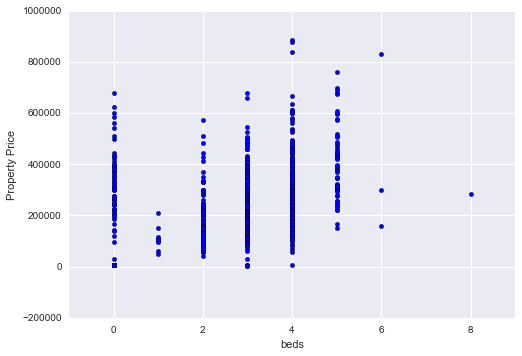

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("beds")
plt.ylabel("Property Price")
plt.show()

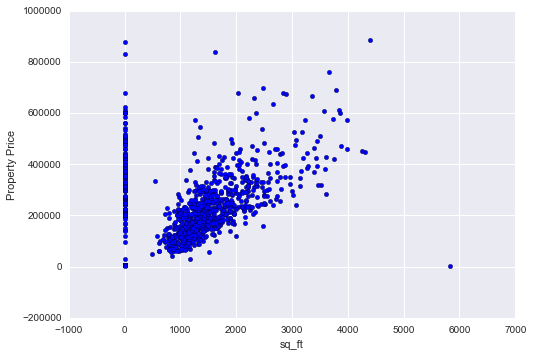

In [13]:
x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("sq_ft")
plt.ylabel("Property Price")
plt.show()

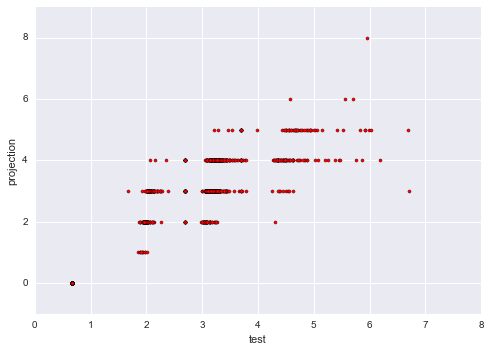

 R^2: 0.733113555451
MSE: 0.45609558563


In [16]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()

# feature engineering: create an interaction term for sq__ft and baths
# data['size_baths'] = data['sq__ft'] * data['baths']

X = data[[ "sq__ft", "baths"]]
# X = data['size_baths']
y = data["beds"]
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(predictions, y, s=10, c='r', marker='o', zorder=10)
plt.xlabel("test")
plt.ylabel("projection")
plt.show()
print'R^2:', lm.score(X,y)
print "MSE:", mean_squared_error(y, predictions)
